## Load data

In [1]:
import unicodedata
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train_pre.csv')

In [3]:
# pretty much useless features
df = df.drop(columns=['Nd', 'Cc', 'No', 'Nl', 'Co', 'Cn'])
df = df.reset_index()

In [4]:
lang_means = df.groupby(["Language"]).mean()
print(lang_means)

              index      Lu       Ll      Zs      Po     Pd     Ps     Pe  \
Language                                                                    
ace       60549.632  13.472  223.534  43.992   7.480  0.784  0.434  0.432   
afr       60773.022  13.716  331.412  69.256   9.190  1.276  0.636  0.636   
als       60433.918  21.422  265.276  56.234   8.472  0.900  0.796  0.710   
amh       60198.206   0.676    4.290  56.952   8.312  0.534  0.944  0.934   
ang       58769.148  10.642  207.452  41.732   6.336  0.348  0.542  0.532   
...             ...     ...      ...     ...     ...    ...    ...    ...   
yid       56569.846   0.678    4.182  59.784   8.054  0.506  0.490  0.490   
yor       60713.550  13.836  242.096  62.848   7.888  1.432  1.120  1.122   
zea       57323.832  10.920  227.444  50.208  11.152  0.850  0.382  0.380   
zh-yue    57598.768   3.958   35.150   7.086  14.244  0.376  2.500  2.498   
zho       61318.910   5.762   12.770   2.656  17.778  0.372  2.296  2.300   

In [5]:
lang_vec = df['Language']
print(lang_vec)

0         est
1         swe
2         mai
3         oci
4         tha
         ... 
117495    bos
117496    lim
117497    lzh
117498    dan
117499    isl
Name: Language, Length: 117500, dtype: object


In [6]:
# One hot encoding of the languages
onehot_lang = pd.get_dummies(lang_vec, prefix='Lang')

In [7]:
data = df.drop('Language', axis=1).drop('index', axis=1)
print(data)

        Lu   Ll   Zs  Po  Pd  Ps  Pe   Lo  Mc  Mn  Pi  Pf  Cf  Sm  Lm  So  Sc  \
0        9  283   45   6   2   0   0    0   0   0   0   0   0   0   0   0   0   
1       17  120   31  11   3   3   3    0   0   0   0   0   0   0   0   0   0   
2        0    0   63   8   0   0   0  237  61  67   0   0   0   0   0   0   0   
3       42  750  159  37   1  16  15    0   0   0   2   4   0   0   0   0   0   
4        3   15   13   1   0   1   1  179   0  41   0   0   0   0   0   0   0   
...     ..  ...  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
117495  26  792  187  27   0   3   3    0   0   0   0   0   0   0   0   0   0   
117496  14  200   45   9   1   0   0    0   0   0   0   0   0   0   0   0   0   
117497   0    0    0  34   0   1   1  195   0   0   0   0   0   0   0   0   0   
117498  19  495  106  16   0   0   0    0   0   0   0   0   0   0   0   0   0   
117499   6  238   46   4   0   0   0    0   0   0   0   0   0   0   0   0   0   

        Sk  Pc  
0        0

In [8]:
norm_data = data.div(data.sum(axis=1), axis=0)
print(norm_data)

              Lu        Ll        Zs        Po        Pd        Ps        Pe  \
0       0.026087  0.820290  0.130435  0.017391  0.005797  0.000000  0.000000   
1       0.090426  0.638298  0.164894  0.058511  0.015957  0.015957  0.015957   
2       0.000000  0.000000  0.144495  0.018349  0.000000  0.000000  0.000000   
3       0.040936  0.730994  0.154971  0.036062  0.000975  0.015595  0.014620   
4       0.011811  0.059055  0.051181  0.003937  0.000000  0.003937  0.003937   
...          ...       ...       ...       ...       ...       ...       ...   
117495  0.025048  0.763006  0.180154  0.026012  0.000000  0.002890  0.002890   
117496  0.052045  0.743494  0.167286  0.033457  0.003717  0.000000  0.000000   
117497  0.000000  0.000000  0.000000  0.147186  0.000000  0.004329  0.004329   
117498  0.029874  0.778302  0.166667  0.025157  0.000000  0.000000  0.000000   
117499  0.020408  0.809524  0.156463  0.013605  0.000000  0.000000  0.000000   

              Lo        Mc        Mn   

### VarianceThresholding for feature selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = data.to_numpy()
Y = norm_data.to_numpy()
print(X.shape)
print(Y.shape)

In [ ]:
selector = VarianceThreshold(0.5)
new_x = selector.fit_transform(X)
selector = VarianceThreshold(0.00005)
new_y = selector.fit_transform(Y)
print(new_x.shape)
print(new_y.shape)

# Scikit RandomForestClassification

### Without normalisation of data

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data, onehot_lang, test_size=0.20, random_state=0)

In [10]:
# fitting the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

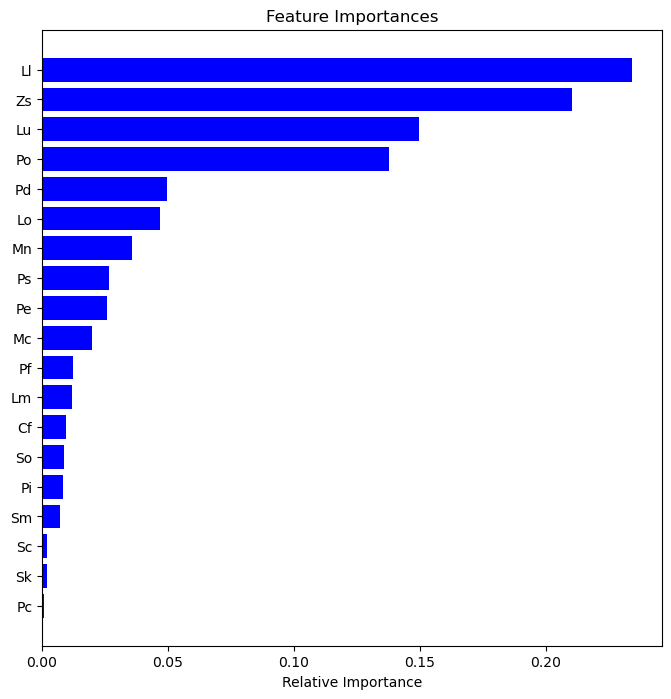

In [11]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.1869787234042553


### With normalisation of the data (each feature is a % of the sentence)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(norm_data, onehot_lang, test_size=0.20, random_state=0)

In [10]:
# fitting the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

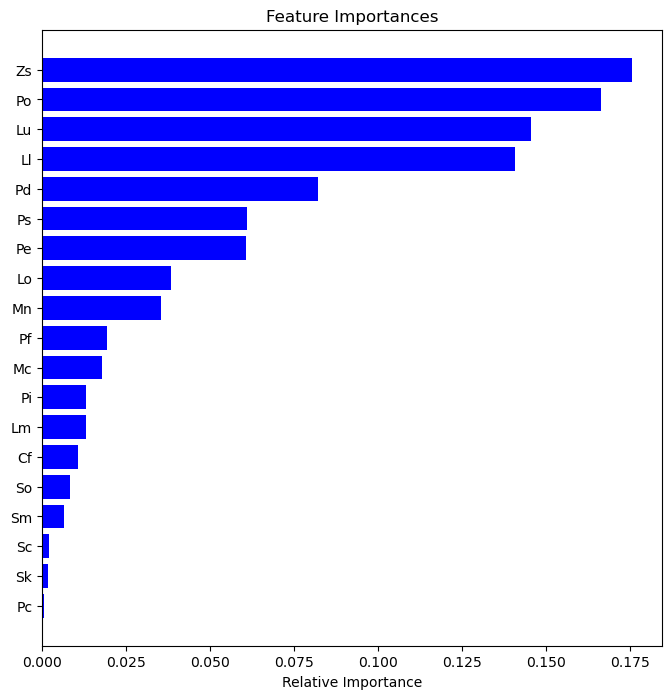

In [11]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.2027659574468085


# XGBoost classification

In [30]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# encode languages in a 1 d vector
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(lang_vec)
label_encoded_y = label_encoder.transform(lang_vec)

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(norm_data, label_encoded_y, test_size=0.20, random_state=42)

model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', n_jobs=-1, max_depth=4)
model.fit(X_train, y_train)

/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

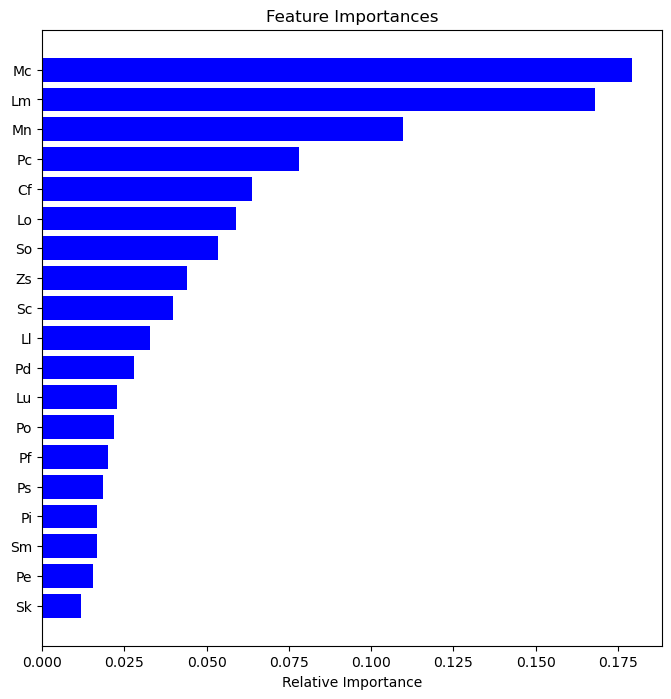

In [31]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.2968085106382979
